In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
warnings.filterwarnings(action="ignore")
import math
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from scipy.stats.mstats import winsorize
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
from sklearn import linear_model

warnings.filterwarnings('ignore')

In [1]:
# Reading Data

In [5]:
df = pd.read_excel("pagespeed_all7.xlsx")
df.head()

,Address,Group,Performance Score,Time to First Byte (ms),First Contentful Paint Time (sec),Speed Index Time (sec),Time to Interactive (sec),CrUX Performance,CrUX First Contentful Paint Time (sec),CrUX First Contentful Paint Category,...,CrUX Origin First Contentful Paint Category,CrUX Origin First Input Delay Time (sec),CrUX Origin First Input Delay Category,First Contentful Paint Score,First Meaningful Paint Time (sec),First Meaningful Paint Score,Speed Index Score,First CPU Idle Time (sec),First CPU Idle Score,Time to Interactive Score
0,https://www.jivox.com/,Business & Consumer,0,790,12.70000,26.10000,43.00000,SLOW,16.92200,SLOW,...,SLOW,0.63500,SLOW,0,12.70000,0,0,21.10000,1,0
1,https://www.wish.com/,Marketplace,0,690,14.00000,17.90000,35.70000,SLOW,11.90100,SLOW,...,SLOW,0.46900,SLOW,0,14.00000,0,0,25.50000,0,0
2,https://www.paratika.com.tr/,Business & Consumer,0,1230,13.90000,25.60000,29.30000,SLOW,5.95100,SLOW,...,SLOW,0.33300,SLOW,0,15.80000,0,0,26.70000,0,0
3,https://www.ataonline.com.tr/,Finance,1,490,17.80000,20.20000,18.90000,SLOW,6.18100,SLOW,...,SLOW,0.27400,SLOW,0,17.90000,0,0,17.90000,2,3
4,https://www.yeniasir.com.tr/,News,1,90,12.10000,12.60000,28.10000,SLOW,3.28000,SLOW,...,SLOW,0.25900,SLOW,0,12.70000,0,3,14.50000,4,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1745 entries, 0 to 1744
Data columns (total 24 columns):
Address                                          1745 non-null object
Group                                            1742 non-null object
Performance Score                                1745 non-null int64
Time to First Byte (ms)                          1745 non-null int64
First Contentful Paint Time (sec)                1745 non-null float64
Speed Index Time (sec)                           1745 non-null float64
Time to Interactive (sec)                        1745 non-null float64
CrUX Performance                                 1618 non-null object
CrUX First Contentful Paint Time (sec)           1618 non-null float64
CrUX First Contentful Paint Category             1618 non-null object
CrUX First Input Delay Time (sec)                1618 non-null float64
CrUX First Input Delay Category                  1618 non-null object
CrUX Origin Performance                          1

In [2]:
# Checking Missing Values

In [8]:
df.isnull().sum()

Address                                            0
Group                                              3
Performance Score                                  0
Time to First Byte (ms)                            0
First Contentful Paint Time (sec)                  0
Speed Index Time (sec)                             0
Time to Interactive (sec)                          0
CrUX Performance                                 127
CrUX First Contentful Paint Time (sec)           127
CrUX First Contentful Paint Category             127
CrUX First Input Delay Time (sec)                127
CrUX First Input Delay Category                  127
CrUX Origin Performance                          128
CrUX Origin First Contentful Paint Time (sec)    128
CrUX Origin First Contentful Paint Category      128
CrUX Origin First Input Delay Time (sec)         128
CrUX Origin First Input Delay Category           128
First Contentful Paint Score                       0
First Meaningful Paint Time (sec)             

In [3]:
# Dropping Missing Values

In [9]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

Address                                          0
Group                                            0
Performance Score                                0
Time to First Byte (ms)                          0
First Contentful Paint Time (sec)                0
Speed Index Time (sec)                           0
Time to Interactive (sec)                        0
CrUX Performance                                 0
CrUX First Contentful Paint Time (sec)           0
CrUX First Contentful Paint Category             0
CrUX First Input Delay Time (sec)                0
CrUX First Input Delay Category                  0
CrUX Origin Performance                          0
CrUX Origin First Contentful Paint Time (sec)    0
CrUX Origin First Contentful Paint Category      0
CrUX Origin First Input Delay Time (sec)         0
CrUX Origin First Input Delay Category           0
First Contentful Paint Score                     0
First Meaningful Paint Time (sec)                0
First Meaningful Paint Score   

In [4]:
# Looking at correlations

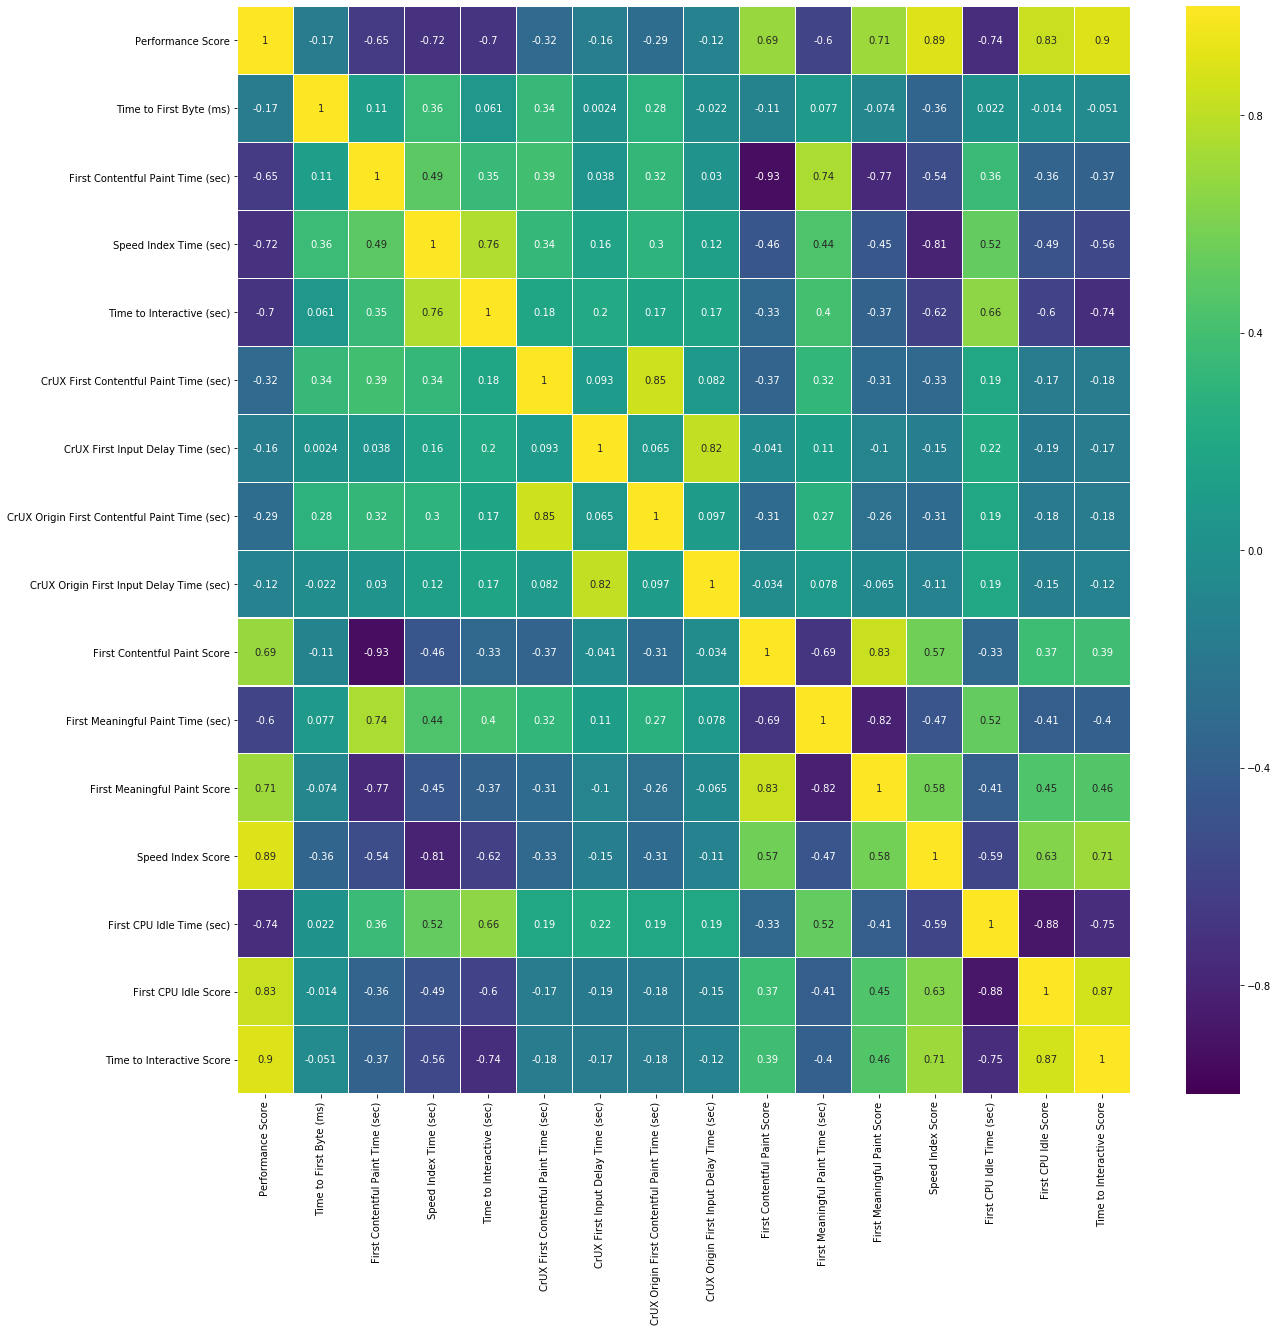

In [13]:
df_kor = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [5]:
# Looking at outliers

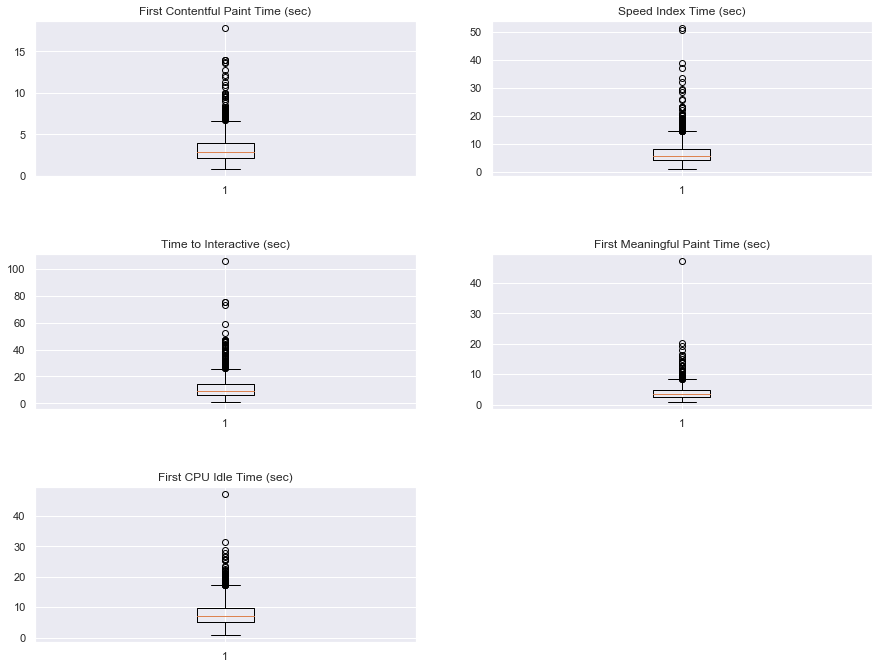

In [14]:
all_col = ["First Contentful Paint Time (sec)", "Speed Index Time (sec)", "Time to Interactive (sec)",  'First Meaningful Paint Time (sec)', 'First CPU Idle Time (sec)']
sns.set(color_codes=True)
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(all_col)):
    plt.subplot(5,2,i+1)
    plt.boxplot(df[all_col[i]])
    plt.title(all_col[i])
    
plt.show()

In [6]:
# To test data both outliers and without outliers, we'll copy our dataframe and apply winsorization for the second one

In [15]:
df2 = df.copy()

In [16]:
df2['First Contentful Paint Time (sec)'] = winsorize(df2['First Contentful Paint Time (sec)'], (0, 0.05))
df2['Speed Index Time (sec)'] = winsorize(df2['Speed Index Time (sec)'], (0, 0.05))
df2['Time to Interactive (sec)'] = winsorize(df2['Time to Interactive (sec)'], (0, 0.06))
df2['First Meaningful Paint Time (sec)'] = winsorize(df2['First Meaningful Paint Time (sec)'], (0, 0.05))
df2['First CPU Idle Time (sec)'] = winsorize(df2['First CPU Idle Time (sec)'], (0, 0.05))

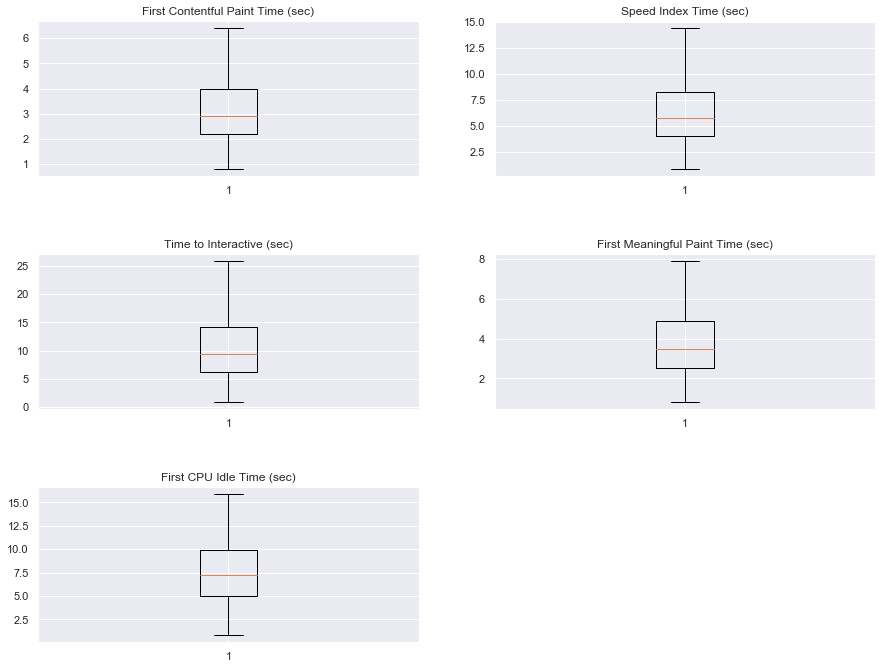

In [17]:
plt.figure(figsize=(15,20))
plt.subplots_adjust(hspace=0.5)

for i in range(len(all_col)):
    plt.subplot(5,2,i+1)
    plt.boxplot(df2[all_col[i]])
    plt.title(all_col[i])
    
plt.show()

In [7]:
#Now let's define X and Y to build linear regression model

In [18]:
Y=df["Performance Score"]

X=df[[ "First Contentful Paint Time (sec)", "Speed Index Time (sec)", "Time to Interactive (sec)",  'First Meaningful Paint Time (sec)', 'First CPU Idle Time (sec)']]

X.head()

,First Contentful Paint Time (sec),Speed Index Time (sec),Time to Interactive (sec),First Meaningful Paint Time (sec),First CPU Idle Time (sec)
0,12.70000,26.10000,43.00000,12.70000,21.10000
1,14.00000,17.90000,35.70000,14.00000,25.50000
2,13.90000,25.60000,29.30000,15.80000,26.70000
3,17.80000,20.20000,18.90000,17.90000,17.90000
4,12.10000,12.60000,28.10000,12.70000,14.50000


In [8]:
#splitting train and test data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

Train Data Count: 1291
Test Data Count: 323


In [9]:
# OLS

In [20]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Score   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.790
Method:                 Least Squares   F-statistic:                     970.2
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:00:03   Log-Likelihood:                -5030.2
No. Observations:                1291   AIC:                         1.007e+04
Df Residuals:                    1285   BIC:                         1.010e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               100.3031      0.835    120.108      0.000      98.665     101.941
First Contentful Paint Time (sec)    -5.6545      0.293    -19.311      0.000      -6.229      -5.080
Speed Index Time (sec)               -1.4324      0.127    -11.245      0.000      -1.682      -1.182
Time to Interactive (sec)            -0.5164      0.070     -7.359      0.000      -0.654      -0.379
First Meaningful Paint Time (sec)     0.8556      0.210      4.079      0.000       0.444       1.267
First CPU Idle Time (sec)            -2.4702      0.115    -21.387      0.000      -2.697      -2.244
==============================================================================
Omnibus:                      455.586   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2543.645
Skew:                           1.535   Prob(JB):                         0.00
Kurtosis:                       9.153   Cond. No.                         48.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [10]:
# Model graph to see predictions

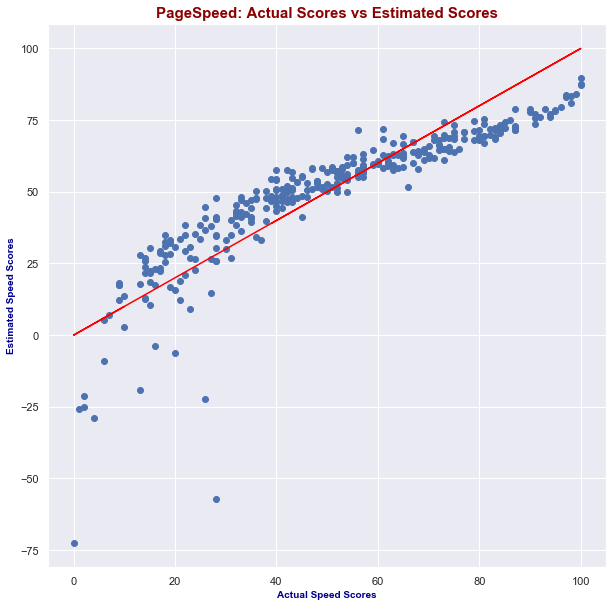

In [21]:
header_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
xy_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,10))
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)
sns.set(color_codes=True)
plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Speed Scores", fontdict=xy_font)
plt.ylabel("Estimated Speed Scores", fontdict=xy_font)
plt.title("PageSpeed: Actual Scores vs Estimated Scores", fontdict=header_font)
plt.show()

In [22]:
# not good prediction !

In [11]:
#errors

In [23]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 8.56069250101459
Mean Sq. Error (MSE)          : 139.91048743595397
Root Mean Sq. Error (RMSE)     : 11.828376365163308
Mean Abs. Perc. Error (MAPE) : inf


In [26]:
# Now lets try with df2 - without outliers

In [24]:
Y=df2["Performance Score"]

X=df2[[ "First Contentful Paint Time (sec)", "Speed Index Time (sec)", "Time to Interactive (sec)",  'First Meaningful Paint Time (sec)', 'First CPU Idle Time (sec)']]

X.head()

,First Contentful Paint Time (sec),Speed Index Time (sec),Time to Interactive (sec),First Meaningful Paint Time (sec),First CPU Idle Time (sec)
0,6.40000,14.40000,25.90000,7.90000,15.90000
1,6.40000,14.40000,25.90000,7.90000,15.90000
2,6.40000,14.40000,25.90000,7.90000,15.90000
3,6.40000,14.40000,18.90000,7.90000,15.90000
4,6.40000,12.60000,25.90000,7.90000,14.50000


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

Train Data Count: 1291
Test Data Count: 323


In [26]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Score   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.923
Method:                 Least Squares   F-statistic:                     3114.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:00:19   Log-Likelihood:                -4378.0
No. Observations:                1291   AIC:                             8768.
Df Residuals:                    1285   BIC:                             8799.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               112.5579      0.582    193.429      0.000     111.416     113.699
First Contentful Paint Time (sec)    -4.6440      0.266    -17.439      0.000      -5.166      -4.122
Speed Index Time (sec)               -2.1848      0.098    -22.378      0.000      -2.376      -1.993
Time to Interactive (sec)            -0.9747      0.059    -16.441      0.000      -1.091      -0.858
First Meaningful Paint Time (sec)    -1.5292      0.214     -7.135      0.000      -1.950      -1.109
First CPU Idle Time (sec)            -2.2114      0.090    -24.618      0.000      -2.388      -2.035
==============================================================================
Omnibus:                       56.593   Durbin-Watson:                   1.909
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.397
Skew:                           0.473   Prob(JB):                     5.67e-13
Kurtosis:                       2.606   Cond. No.                         51.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

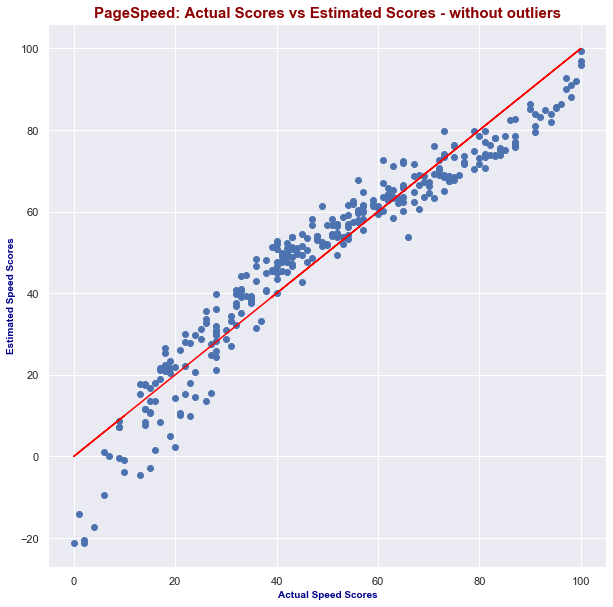

In [27]:
header_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
xy_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,10))
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Speed Scores", fontdict=xy_font)
plt.ylabel("Estimated Speed Scores", fontdict=xy_font)
plt.title("PageSpeed: Actual Scores vs Estimated Scores - without outliers", fontdict=header_font)
plt.show()

In [28]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 5.715370395272737
Mean Sq. Error (MSE)          : 48.893438989452754
Root Mean Sq. Error (RMSE)     : 6.992384356530521
Mean Abs. Perc. Error (MAPE) : inf


In [29]:
# this is better but still not good, now let's try log transformation for both df and df2

In [30]:
Y=df["Performance Score"]

X=np.log10(df[[ "First Contentful Paint Time (sec)", "Speed Index Time (sec)", "Time to Interactive (sec)",  'First Meaningful Paint Time (sec)', 'First CPU Idle Time (sec)']])

X.head()

,First Contentful Paint Time (sec),Speed Index Time (sec),Time to Interactive (sec),First Meaningful Paint Time (sec),First CPU Idle Time (sec)
0,1.10380,1.41664,1.63347,1.10380,1.32428
1,1.14613,1.25285,1.55267,1.14613,1.40654
2,1.14301,1.40824,1.46687,1.19866,1.42651
3,1.25042,1.30535,1.27646,1.25285,1.25285
4,1.08279,1.10037,1.44871,1.10380,1.16137


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

Train Data Count: 1291
Test Data Count: 323


In [32]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Score   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     4096.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:00:33   Log-Likelihood:                -4213.0
No. Observations:                1291   AIC:                             8438.
Df Residuals:                    1285   BIC:                             8469.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               143.1648      0.703    203.614      0.000     141.785     144.544
First Contentful Paint Time (sec)   -27.0745      1.633    -16.579      0.000     -30.278     -23.871
Speed Index Time (sec)              -34.3062      1.210    -28.359      0.000     -36.679     -31.933
Time to Interactive (sec)           -29.8350      1.359    -21.957      0.000     -32.501     -27.169
First Meaningful Paint Time (sec)    -5.7444      1.542     -3.725      0.000      -8.770      -2.719
First CPU Idle Time (sec)           -26.8697      1.482    -18.133      0.000     -29.777     -23.963
==============================================================================
Omnibus:                      159.024   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1461.868
Skew:                          -0.154   Prob(JB):                         0.00
Kurtosis:                       8.204   Cond. No.                         23.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

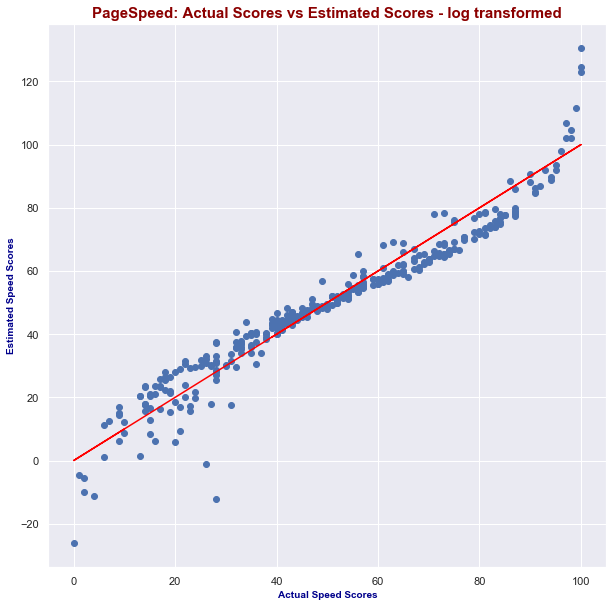

In [33]:
header_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
xy_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,10))
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Speed Scores", fontdict=xy_font)
plt.ylabel("Estimated Speed Scores", fontdict=xy_font)
plt.title("PageSpeed: Actual Scores vs Estimated Scores - log transformed", fontdict=header_font)
plt.show()

In [34]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 4.773760504161997
Mean Sq. Error (MSE)          : 43.18201931645037
Root Mean Sq. Error (RMSE)     : 6.571302710760658
Mean Abs. Perc. Error (MAPE) : inf


In [12]:
# log transformation without outliers

In [36]:
Y=df2["Performance Score"]

X=np.log10(df2[[ "First Contentful Paint Time (sec)", "Speed Index Time (sec)", "Time to Interactive (sec)",  'First Meaningful Paint Time (sec)', 'First CPU Idle Time (sec)']])

X.head()

,First Contentful Paint Time (sec),Speed Index Time (sec),Time to Interactive (sec),First Meaningful Paint Time (sec),First CPU Idle Time (sec)
0,0.80618,1.15836,1.41330,0.89763,1.20140
1,0.80618,1.15836,1.41330,0.89763,1.20140
2,0.80618,1.15836,1.41330,0.89763,1.20140
3,0.80618,1.15836,1.27646,0.89763,1.20140
4,0.80618,1.10037,1.41330,0.89763,1.16137


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

Train Data Count: 1291
Test Data Count: 323


In [38]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Score   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     5664.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:00:46   Log-Likelihood:                -4014.4
No. Observations:                1291   AIC:                             8041.
Df Residuals:                    1285   BIC:                             8072.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                               147.5514      0.623    236.658      0.000     146.328     148.775
First Contentful Paint Time (sec)   -24.2596      1.513    -16.033      0.000     -27.228     -21.291
Speed Index Time (sec)              -37.5753      1.084    -34.652      0.000     -39.703     -35.448
Time to Interactive (sec)           -35.2627      1.276    -27.636      0.000     -37.766     -32.760
First Meaningful Paint Time (sec)    -9.5337      1.435     -6.642      0.000     -12.349      -6.718
First CPU Idle Time (sec)           -22.9242      1.388    -16.519      0.000     -25.647     -20.202
==============================================================================
Omnibus:                      601.505   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7051.016
Skew:                          -1.850   Prob(JB):                         0.00
Kurtosis:                      13.835   Cond. No.                         25.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

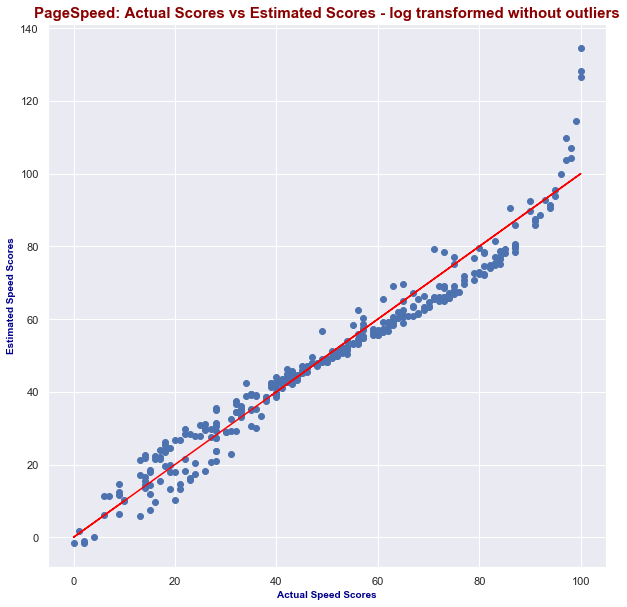

In [39]:
header_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
xy_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,10))
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Speed Scores", fontdict=xy_font)
plt.ylabel("Estimated Speed Scores", fontdict=xy_font)
plt.title("PageSpeed: Actual Scores vs Estimated Scores - log transformed without outliers", fontdict=header_font)
plt.show()

In [40]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 3.9137419834295764
Mean Sq. Error (MSE)          : 28.793881872098027
Root Mean Sq. Error (RMSE)     : 5.365993092811248
Mean Abs. Perc. Error (MAPE) : inf


In [13]:
# last one is better for predictions

### Pagespeed Score = 147.32 - 24.25(logFCP) - 37.67(logSIT) - 34.20(logTTI) - 9.53(logFMP) - 23.72(logCPU)

In [14]:
# Let's use polynomial features to see if we can do better 

In [42]:
from sklearn.preprocessing import PolynomialFeatures


In [43]:
df2.rename(columns = {'First Contentful Paint Time (sec)': 'FCP', 'Speed Index Time (sec)': 'SIT', 'Time to Interactive (sec)': 'TTI', 'First Meaningful Paint Time (sec)': 'FMP', 'First CPU Idle Time (sec)': 'CPU'},inplace=True)

In [44]:
poly = PolynomialFeatures(2)

In [45]:
df5 = df2[["FCP", "SIT", "TTI",  'FMP', 'CPU']]
df5.head()

,FCP,SIT,TTI,FMP,CPU
0,6.40000,14.40000,25.90000,7.90000,15.90000
1,6.40000,14.40000,25.90000,7.90000,15.90000
2,6.40000,14.40000,25.90000,7.90000,15.90000
3,6.40000,14.40000,18.90000,7.90000,15.90000
4,6.40000,12.60000,25.90000,7.90000,14.50000


In [46]:
df5.rename(columns = {'First Contentful Paint Time (sec)': 'FCP', 'Speed Index Time (sec)': 'SIT', 'Time to Interactive (sec)': 'TTI', 'First Meaningful Paint Time (sec)': 'FMP', 'First CPU Idle Time (sec)': 'CPU'},inplace=True)

In [47]:
df5.head()

,FCP,SIT,TTI,FMP,CPU
0,6.40000,14.40000,25.90000,7.90000,15.90000
1,6.40000,14.40000,25.90000,7.90000,15.90000
2,6.40000,14.40000,25.90000,7.90000,15.90000
3,6.40000,14.40000,18.90000,7.90000,15.90000
4,6.40000,12.60000,25.90000,7.90000,14.50000


In [48]:
df6 = poly.fit_transform(df5)
df7 = pd.DataFrame(df6)
df7.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,1.00000,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,...,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
1,1.00000,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,...,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
2,1.00000,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,...,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
3,1.00000,6.40000,14.40000,18.90000,7.90000,15.90000,40.96000,92.16000,120.96000,50.56000,...,207.36000,272.16000,113.76000,228.96000,357.21000,149.31000,300.51000,62.41000,125.61000,252.81000
4,1.00000,6.40000,12.60000,25.90000,7.90000,14.50000,40.96000,80.64000,165.76000,50.56000,...,158.76000,326.34000,99.54000,182.70000,670.81000,204.61000,375.55000,62.41000,114.55000,210.25000


In [49]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2']

In [50]:
df7.columns = poly.get_feature_names()

In [51]:
df7.head()

,1,x0,x1,x2,x3,x4,x0^2,x0 x1,x0 x2,x0 x3,...,x1^2,x1 x2,x1 x3,x1 x4,x2^2,x2 x3,x2 x4,x3^2,x3 x4,x4^2
0,1.00000,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,...,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
1,1.00000,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,...,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
2,1.00000,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,...,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
3,1.00000,6.40000,14.40000,18.90000,7.90000,15.90000,40.96000,92.16000,120.96000,50.56000,...,207.36000,272.16000,113.76000,228.96000,357.21000,149.31000,300.51000,62.41000,125.61000,252.81000
4,1.00000,6.40000,12.60000,25.90000,7.90000,14.50000,40.96000,80.64000,165.76000,50.56000,...,158.76000,326.34000,99.54000,182.70000,670.81000,204.61000,375.55000,62.41000,114.55000,210.25000


In [52]:
df7['Performance Score'] = df2["Performance Score"]

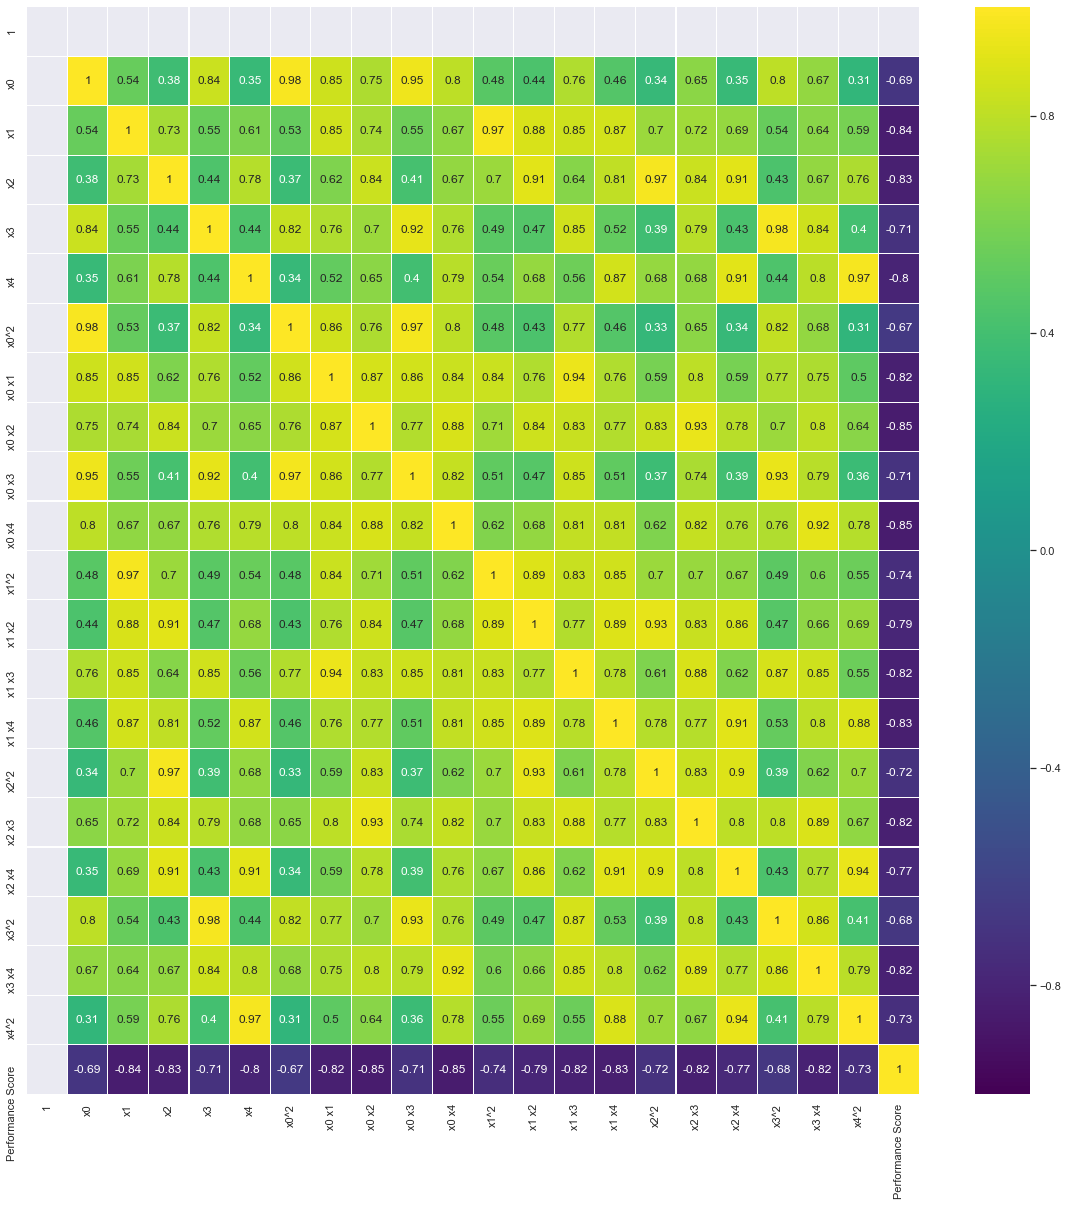

In [53]:
df_kor = df7.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df_kor, vmin=-1, vmax=1, cmap="viridis", annot=True, linewidth=0.1)

In [54]:
df7['Performance Score'].isnull().sum()

106

In [55]:
df7.dropna(inplace = True)

In [15]:
# built the model

In [57]:
Y=df7["Performance Score"]

X=df7.drop(['Performance Score','1'], axis =1) 

X.head()

,x0,x1,x2,x3,x4,x0^2,x0 x1,x0 x2,x0 x3,x0 x4,x1^2,x1 x2,x1 x3,x1 x4,x2^2,x2 x3,x2 x4,x3^2,x3 x4,x4^2
0,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,101.76000,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
1,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,101.76000,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
2,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,92.16000,165.76000,50.56000,101.76000,207.36000,372.96000,113.76000,228.96000,670.81000,204.61000,411.81000,62.41000,125.61000,252.81000
3,6.40000,14.40000,18.90000,7.90000,15.90000,40.96000,92.16000,120.96000,50.56000,101.76000,207.36000,272.16000,113.76000,228.96000,357.21000,149.31000,300.51000,62.41000,125.61000,252.81000
4,6.40000,12.60000,25.90000,7.90000,14.50000,40.96000,80.64000,165.76000,50.56000,92.80000,158.76000,326.34000,99.54000,182.70000,670.81000,204.61000,375.55000,62.41000,114.55000,210.25000


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

Train Data Count: 1206
Test Data Count: 302


In [59]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Score   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                     6586.
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:01:54   Log-Likelihood:                -2672.2
No. Observations:                1206   AIC:                             5386.
Df Residuals:                    1185   BIC:                             5493.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.2019      0.468    260.894      0.000     121.283     123.121
x0            -0.8915      0.367     -2.430      0.015      -1.611      -0.172
x1            -5.3353      0.123    -43.500      0.000      -5.576      -5.095
x2            -3.7431      0.087    -43.242      0.000      -3.913      -3.573
x3            -1.2036      0.286     -4.206      0.000      -1.765      -0.642
x4            -2.3747      0.134    -17.691      0.000      -2.638      -2.111
x0^2          -0.3981      0.081     -4.936      0.000      -0.556      -0.240
x0 x1         -0.0184      0.035     -0.527      0.598      -0.087       0.050
x0 x2          0.0187      0.021      0.876      0.381      -0.023       0.061
x0 x3          0.1913      0.111      1.721      0.086      -0.027       0.409
x0 x4         -0.1025      0.036     -2.810      0.005      -0.174      -0.031
x1^2           0.2018      0.009     23.206      0.000       0.185       0.219
x1 x2         -0.0114      0.007     -1.660      0.097      -0.025       0.002
x1 x3         -0.0184      0.028     -0.653      0.514      -0.073       0.037
x1 x4          0.0164      0.012      1.371      0.171      -0.007       0.040
x2^2           0.0899      0.004     22.459      0.000       0.082       0.098
x2 x3          0.0054      0.018      0.303      0.762      -0.029       0.040
x2 x4         -0.0034      0.008     -0.399      0.690      -0.020       0.013
x3^2          -0.0345      0.056     -0.612      0.541      -0.145       0.076
x3 x4          0.0010      0.030      0.035      0.972      -0.057       0.059
x4^2           0.0913      0.010      9.446      0.000       0.072       0.110
==============================================================================
Omnibus:                      401.230   Durbin-Watson:                   2.139
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2510.302
Skew:                          -1.391   Prob(JB):                         0.00
Kurtosis:                       9.497   Cond. No.                     2.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# some variables have p value more than 0.05. Let's drop them and built the model without them

In [61]:
Y=df7["Performance Score"]

X=df7[[ "x0", "x1", "x2",  'x3', 'x4', 'x0^2', 'x0 x4', 'x1^2', 'x2^2', 'x4^2']]

X.head()

,x0,x1,x2,x3,x4,x0^2,x0 x4,x1^2,x2^2,x4^2
0,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,101.76000,207.36000,670.81000,252.81000
1,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,101.76000,207.36000,670.81000,252.81000
2,6.40000,14.40000,25.90000,7.90000,15.90000,40.96000,101.76000,207.36000,670.81000,252.81000
3,6.40000,14.40000,18.90000,7.90000,15.90000,40.96000,101.76000,207.36000,357.21000,252.81000
4,6.40000,12.60000,25.90000,7.90000,14.50000,40.96000,92.80000,158.76000,670.81000,210.25000


In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print('Train Data Count: {}'.format(X_train.shape[0]))
print('Test Data Count: {}'.format(X_test.shape[0]))

Train Data Count: 1206
Test Data Count: 302


In [63]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Performance Score   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 1.317e+04
Date:                Thu, 28 Nov 2019   Prob (F-statistic):               0.00
Time:                        13:04:45   Log-Likelihood:                -2677.3
No. Observations:                1206   AIC:                             5377.
Df Residuals:                    1195   BIC:                             5433.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        122.3141      0.461    265.179      0.000     121.409     123.219
x0            -1.1297      0.249     -4.536      0.000      -1.618      -0.641
x1            -5.3471      0.117    -45.604      0.000      -5.577      -5.117
x2            -3.7044      0.079    -46.843      0.000      -3.860      -3.549
x3            -1.0207      0.070    -14.658      0.000      -1.157      -0.884
x4            -2.4410      0.128    -19.047      0.000      -2.692      -2.190
x0^2          -0.2599      0.032     -8.161      0.000      -0.322      -0.197
x0 x4         -0.0666      0.016     -4.082      0.000      -0.099      -0.035
x1^2           0.1941      0.007     28.574      0.000       0.181       0.207
x2^2           0.0873      0.002     35.650      0.000       0.083       0.092
x4^2           0.0929      0.007     14.284      0.000       0.080       0.106
==============================================================================
Omnibus:                      398.924   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2471.506
Skew:                          -1.386   Prob(JB):                         0.00
Kurtosis:                       9.442   Cond. No.                     2.03e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

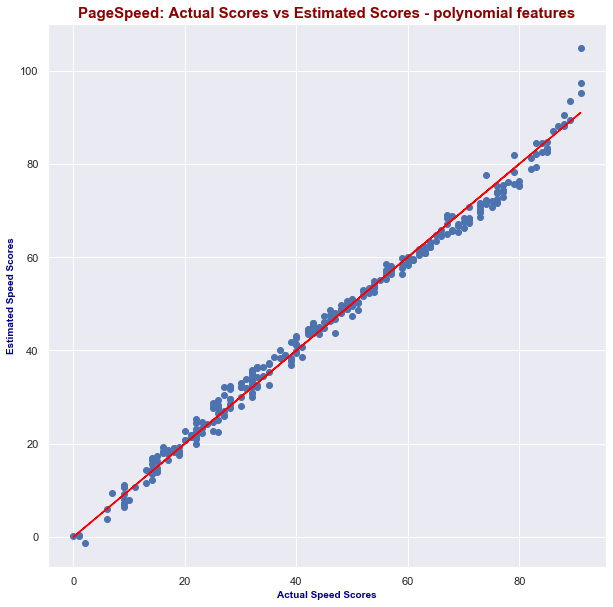

In [65]:
header_font = {'family': 'arial','color':  'darkred','weight': 'bold','size': 15 }
xy_font = {'family': 'arial','color':  'darkblue','weight': 'bold','size': 10 }
plt.figure(figsize=(10,10))
X_test = sm.add_constant(X_test)

y_preds = results.predict(X_test)

plt.scatter(y_test, y_preds)
plt.plot(y_test, y_test, color="red")
plt.xlabel("Actual Speed Scores", fontdict=xy_font)
plt.ylabel("Estimated Speed Scores", fontdict=xy_font)
plt.title("PageSpeed: Actual Scores vs Estimated Scores - polynomial features", fontdict=header_font)
plt.show()

In [66]:
print("Mean Absolute Error (MAE)        : {}".format(mean_absolute_error(y_test, y_preds)))
print("Mean Sq. Error (MSE)          : {}".format(mse(y_test, y_preds)))
print("Root Mean Sq. Error (RMSE)     : {}".format(rmse(y_test, y_preds)))
print("Mean Abs. Perc. Error (MAPE) : {}".format(np.mean(np.abs((y_test - y_preds) / y_test)) * 100))

Mean Absolute Error (MAE)        : 1.6731942427924227
Mean Sq. Error (MSE)          : 4.711714302632787
Root Mean Sq. Error (RMSE)     : 2.1706483599682347
Mean Abs. Perc. Error (MAPE) : inf


#### PAGESPEED SCORE = 122.3141 - 1.1297FCP - 5.3471SIT - 3.7044TTI - 1.0207FMP - 2.4410CPU - 0.2599(FCP^2) - 0.0666(FCP*CPU) + 0.1941(SIT^2) + 0.0873(TTI^2) + 0.0929(CPU^2)

In [17]:
# This one has the best predictions! 